# Chapter 25: Time Series

Date/time handling, time-based indexing, resampling, rolling windows, and time zones



### Why Time Series? (Slide 108)


<p><strong>Time series data</strong> is everywhere — stock prices, weather, sensor readings, web traffic, sales data.</p>
<p><strong>Python's Time Tools:</strong></p>
<ul>
<li><code>datetime</code> module — Python's built-in date/time types</li>
<li><code>pd.Timestamp</code> — pandas' enhanced datetime (nanosecond precision)</li>
<li><code>pd.DatetimeIndex</code> — index of timestamps (enables time-based ops)</li>
<li><code>pd.date_range()</code> — generate regular date sequences</li>
</ul>
<p><strong>What pandas adds:</strong></p>
<ul>
<li>Automatic alignment by date</li>
<li>Resampling (e.g., daily → monthly)</li>
<li>Rolling windows (moving averages)</li>
<li>Time zone handling</li>
<li>Period arithmetic (quarters, fiscal years)</li>
</ul>


> **Note:** A DatetimeIndex unlocks powerful time-based operations


### Python datetime Basics (Slide 109)


In [1]:
# datetime.datetime(y, m, d, h, m, s) — date + time
# datetime.date(y, m, d)               — date only
# datetime.timedelta(days=N)           — duration
# .strftime(format)   — datetime → string
# .strptime(str, fmt) — string → datetime

from datetime import datetime, timedelta

now = datetime.now()
print(now)                    # 2024-01-15 14:30:00
print(now.year, now.month, now.day)  # 2024 1 15

# Arithmetic with timedelta
tomorrow = now + timedelta(days=1)
last_week = now - timedelta(weeks=1)
diff = datetime(2024, 12, 31) - now
print(diff.days)  # days until end of year

# Format codes:
# %Y=year  %m=month  %d=day  %H=hour  %M=min  %S=sec
print(now.strftime('%Y-%m-%d'))        # '2024-01-15'
print(now.strftime('%B %d, %Y'))       # 'January 15, 2024'

# Parse string → datetime
dt = datetime.strptime('2024-03-15', '%Y-%m-%d')
print(dt)


2026-02-13 01:23:21.043682
2026 2 13
-410
2026-02-13
February 13, 2026
2024-03-15 00:00:00


> **Note:** %Y=4-digit year, %m=zero-padded month, %d=zero-padded day


### pandas Timestamp & DatetimeIndex (Slide 110)


In [2]:
# pd.Timestamp('date')      — single timestamp
# pd.to_datetime(arg)       — flexible date parsing
# pd.DatetimeIndex(dates)   — index of timestamps
# Series with DatetimeIndex enables time-based selection

import pandas as pd
import numpy as np

# Create timestamps
ts = pd.Timestamp('2024-01-15')
print(ts)               # 2024-01-15 00:00:00
print(ts.year, ts.day_name())  # 2024 Monday

# Parse various formats automatically
print(pd.to_datetime('Jan 15, 2024'))
print(pd.to_datetime('15/01/2024', dayfirst=True))
print(pd.to_datetime('2024-01-15 14:30:00'))

# Time Series = Series with DatetimeIndex
dates = [datetime(2024, 1, 1), datetime(2024, 1, 8),
         datetime(2024, 1, 15), datetime(2024, 1, 22)]
ts = pd.Series(np.random.randn(4), index=dates)
print(ts.index)  # DatetimeIndex
print(ts['2024-01-15'])  # Select by date string!


2024-01-15 00:00:00
2024 Monday
2024-01-15 00:00:00
2024-01-15 00:00:00
2024-01-15 14:30:00
DatetimeIndex(['2024-01-01', '2024-01-08', '2024-01-15', '2024-01-22'], dtype='datetime64[us]', freq=None)
1.29407771642457


> **Note:** pd.to_datetime is incredibly flexible at parsing date formats


### pd.date_range: Generating Date Sequences (Slide 111)


In [3]:
# pd.date_range(start, periods, freq) — regular date sequence
# freq='D'=daily, 'B'=business days, 'W'=weekly
# freq='ME'=month end, 'MS'=month start
# freq='QE'=quarter end, 'A'=year end
# freq='h'=hourly, 'T'=minute, 'S'=second
# freq='4h'=every 4 hours, '2W'=every 2 weeks

import pandas as pd

# 10 calendar days
print(pd.date_range('2024-01-01', periods=10, freq='D'))

# Business days only (Mon-Fri)
print(pd.date_range('2024-01-01', periods=10, freq='B'))

# Monthly (end of month)
print(pd.date_range('2024-01-01', periods=6, freq='ME'))

# Monthly (start of month)
print(pd.date_range('2024-01-01', periods=6, freq='MS'))

# Every 4 hours
print(pd.date_range('2024-01-01', periods=6, freq='4h'))

# Between two dates
print(pd.date_range('2024-01-01', '2024-03-01', freq='W-MON'))

# Create a time series
ts = pd.Series(range(12),
               index=pd.date_range('2024', periods=12, freq='MS'))


DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10'],
              dtype='datetime64[us]', freq='D')
DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12'],
              dtype='datetime64[us]', freq='B')
DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30'],
              dtype='datetime64[us]', freq='ME')
DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01'],
              dtype='datetime64[us]', freq='MS')
DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 04:00:00',
               '2024-01-01 08:00:00', '2024-01-01 12:00:00',
               '2024-01-01 16:00:00', '2024-01-01 20:00:00'],
              dtype=

> **Note:** freq='B' skips weekends — great for financial data


### Time-Based Indexing & Selection (Slide 112)


In [4]:
# ts['2024']        — select entire year
# ts['2024-03']     — select entire month
# ts['2024-01':'2024-06'] — slice by date range
# ts.truncate(before, after) — trim to date range
# .dt accessor for datetime columns

import pandas as pd
import numpy as np

# Create a year of daily data
ts = pd.Series(np.random.randn(365),
               index=pd.date_range('2024-01-01', periods=365))

# Select by year
print(ts['2024'].shape)     # (365,)

# Select by month
print(ts['2024-03'].shape)  # (31,) — all March data

# Slice by date range (inclusive!)
print(ts['2024-03-01':'2024-03-15'])

# Truncate
print(ts.truncate(before='2024-06-01', after='2024-06-30'))

# .dt accessor on DataFrame columns
df = pd.DataFrame({'date': pd.date_range('2024', periods=100)})
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_name'] = df['date'].dt.day_name()
df['quarter'] = df['date'].dt.quarter


(365,)
(31,)
2024-03-01    0.960250
2024-03-02    0.888795
2024-03-03   -1.724518
2024-03-04   -0.643605
2024-03-05    2.014881
2024-03-06    0.838352
2024-03-07   -1.735219
2024-03-08    1.869233
2024-03-09    1.390164
2024-03-10    1.239059
2024-03-11   -1.490659
2024-03-12    0.262236
2024-03-13    1.248703
2024-03-14    0.410771
2024-03-15   -0.763227
Freq: D, dtype: float64
2024-06-01    1.389153
2024-06-02    0.158917
2024-06-03   -0.387691
2024-06-04   -0.145723
2024-06-05   -1.823084
2024-06-06    0.043620
2024-06-07    0.927241
2024-06-08    0.350235
2024-06-09   -0.492394
2024-06-10   -0.151991
2024-06-11    1.346027
2024-06-12   -0.105852
2024-06-13    0.186004
2024-06-14    0.048605
2024-06-15    1.396094
2024-06-16    1.098188
2024-06-17   -0.320970
2024-06-18   -0.646297
2024-06-19    0.529042
2024-06-20   -1.457043
2024-06-21    1.849406
2024-06-22    1.051489
2024-06-23   -0.332485
2024-06-24   -1.410380
2024-06-25    0.462720
2024-06-26   -0.399976
2024-06-27   -0.0480

> **Note:** Date string slicing is INCLUSIVE on both ends (unlike integer slicing)


### Resampling: Changing Frequency (Slide 113)


In [5]:
# .resample(freq)     — group by time frequency, then aggregate
# .resample('ME')      — monthly
# .resample('W')      — weekly
# .resample('QE')      — quarterly
# Similar to groupby but for time!
# Downsampling: high freq → low freq (daily → monthly)
# Upsampling: low freq → high freq (monthly → daily)

import pandas as pd
import numpy as np

# Daily data for 1 year
ts = pd.Series(np.random.randn(365),
               index=pd.date_range('2024', periods=365))

# Downsampling: daily → monthly mean
monthly = ts.resample('ME').mean()
print(monthly)

# Downsample with multiple aggregations
print(ts.resample('ME').agg(['mean', 'std', 'min', 'max']))

# Quarterly sum
print(ts.resample('QE').sum())

# Weekly OHLC (Open, High, Low, Close)
print(ts.resample('W').ohlc())

# Upsampling: monthly → daily (fill forward)
monthly_data = pd.Series([100, 200, 150],
                         index=pd.date_range('2024-01', periods=3, freq='MS'))
daily = monthly_data.resample('D').ffill()
print(daily.head(10))


2024-01-31   -0.425373
2024-02-29    0.190523
2024-03-31   -0.106709
2024-04-30   -0.152779
2024-05-31   -0.181628
2024-06-30    0.260628
2024-07-31    0.186481
2024-08-31    0.233090
2024-09-30    0.097512
2024-10-31    0.083657
2024-11-30   -0.231769
2024-12-31   -0.164260
Freq: ME, dtype: float64
                mean       std       min       max
2024-01-31 -0.425373  0.811305 -1.771372  1.113929
2024-02-29  0.190523  0.732029 -0.989296  1.715993
2024-03-31 -0.106709  0.890306 -1.642895  2.116409
2024-04-30 -0.152779  0.910120 -1.847887  1.945895
2024-05-31 -0.181628  0.823899 -1.591030  1.762694
2024-06-30  0.260628  0.989436 -1.761003  2.630663
2024-07-31  0.186481  0.800910 -1.842368  1.438293
2024-08-31  0.233090  1.086105 -2.118622  2.611727
2024-09-30  0.097512  1.017215 -2.205449  1.979897
2024-10-31  0.083657  1.188353 -2.583799  1.717139
2024-11-30 -0.231769  0.774151 -2.419351  1.213467
2024-12-31 -0.164260  0.963046 -2.501796  1.849857
2024-03-31   -10.969403
2024-06-30  

> **Note:** resample is the time series equivalent of groupby


### Shifting & Lagging (Slide 114)


In [6]:
# .shift(n)           — shift data forward (positive) or backward (negative)
# .shift(n, freq='D') — shift the INDEX instead of data
# .pct_change()       — percentage change from previous value
# .diff()             — difference from previous value
# Useful for: returns, growth rates, comparisons

import pandas as pd
import numpy as np

ts = pd.Series([100, 105, 103, 110, 108],
               index=pd.date_range('2024-01-01', periods=5))

# Shift data forward (lag)
print(ts.shift(1))   # Yesterday's data aligned with today's index

# Shift data backward (lead)
print(ts.shift(-1))  # Tomorrow's data aligned with today's index

# Percentage change (daily returns)
returns = ts.pct_change()
print(returns)
# NaN, 0.05, -0.019, 0.068, -0.018

# Absolute difference
print(ts.diff())
# NaN, 5, -2, 7, -2

# Year-over-year growth (shift by 12 months)
# yoy_growth = ts / ts.shift(12) - 1


2024-01-01      NaN
2024-01-02    100.0
2024-01-03    105.0
2024-01-04    103.0
2024-01-05    110.0
Freq: D, dtype: float64
2024-01-01    105.0
2024-01-02    103.0
2024-01-03    110.0
2024-01-04    108.0
2024-01-05      NaN
Freq: D, dtype: float64
2024-01-01         NaN
2024-01-02    0.050000
2024-01-03   -0.019048
2024-01-04    0.067961
2024-01-05   -0.018182
Freq: D, dtype: float64
2024-01-01    NaN
2024-01-02    5.0
2024-01-03   -2.0
2024-01-04    7.0
2024-01-05   -2.0
Freq: D, dtype: float64


> **Note:** shift(1) + division = percentage return calculation


### Rolling Windows & Moving Averages (Slide 115)


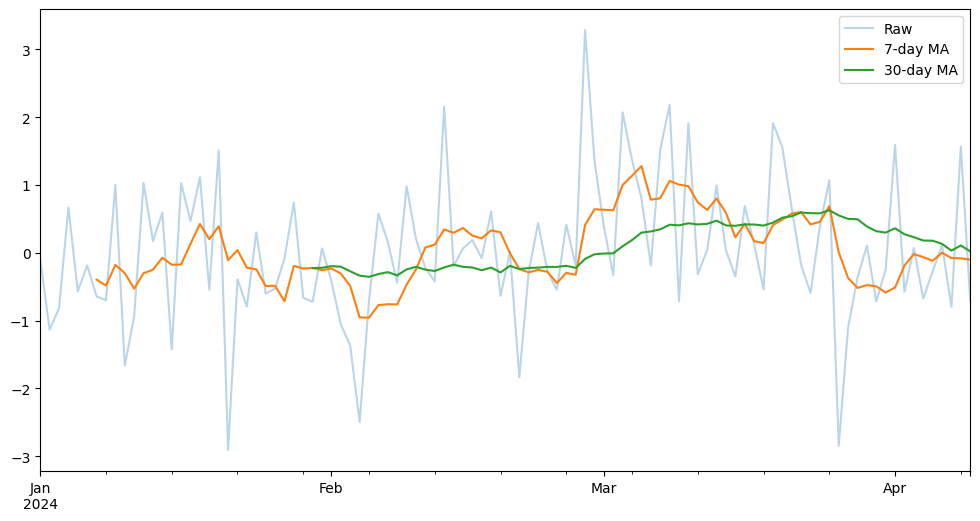

In [7]:
# .rolling(window)     — rolling window of N periods
# .rolling(N).mean()   — moving average
# .rolling(N).std()    — rolling standard deviation
# .rolling(N).sum()    — rolling sum
# .expanding()         — expanding window (cumulative)
# .ewm(span=N)        — exponentially weighted (recent data = more weight)

import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(100),
               index=pd.date_range('2024', periods=100))

# 7-day moving average
ma7 = ts.rolling(7).mean()

# 30-day moving average
ma30 = ts.rolling(30).mean()

# Rolling standard deviation (volatility)
vol = ts.rolling(20).std()

# Expanding mean (cumulative average)
cum_mean = ts.expanding().mean()

# Exponentially weighted moving average
# Recent values weighted more heavily
ewma = ts.ewm(span=20).mean()

# Plot them all
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
ts.plot(alpha=0.3, label='Raw')
ma7.plot(label='7-day MA')
ma30.plot(label='30-day MA')
ax.legend()
plt.show()


> **Note:** Rolling windows are essential for smoothing noisy time series


### Time Zones (Slide 116)


In [8]:
# .tz_localize(tz)    — assign timezone to naive datetime
# .tz_convert(tz)     — convert between timezones
# Common zones: 'UTC', 'US/Eastern', 'Europe/London', 'Asia/Kolkata'
# import pytz for full timezone list

import pandas as pd

# Create timezone-aware dates
rng = pd.date_range('2024-01-01', periods=6, freq='D', tz='UTC')
ts = pd.Series(range(6), index=rng)
print(ts.index.tz)  # UTC

# Convert UTC to other timezones
us_eastern = ts.tz_convert('US/Eastern')
print(us_eastern.index)

india = ts.tz_convert('Asia/Kolkata')
print(india.index)  # UTC+5:30

# Localize naive timestamps (assign timezone)
naive = pd.date_range('2024-01-01', periods=6, freq='D')
ts_naive = pd.Series(range(6), index=naive)
ts_utc = ts_naive.tz_localize('UTC')
ts_ist = ts_utc.tz_convert('Asia/Kolkata')

# Operations between timezone-aware series auto-convert to UTC
print(us_eastern + india)  # Auto-aligned to UTC


UTC
DatetimeIndex(['2023-12-31 19:00:00-05:00', '2024-01-01 19:00:00-05:00',
               '2024-01-02 19:00:00-05:00', '2024-01-03 19:00:00-05:00',
               '2024-01-04 19:00:00-05:00', '2024-01-05 19:00:00-05:00'],
              dtype='datetime64[us, US/Eastern]', freq=None)
DatetimeIndex(['2024-01-01 05:30:00+05:30', '2024-01-02 05:30:00+05:30',
               '2024-01-03 05:30:00+05:30', '2024-01-04 05:30:00+05:30',
               '2024-01-05 05:30:00+05:30', '2024-01-06 05:30:00+05:30'],
              dtype='datetime64[us, Asia/Kolkata]', freq=None)
2024-01-01 00:00:00+00:00     0
2024-01-02 00:00:00+00:00     2
2024-01-03 00:00:00+00:00     4
2024-01-04 00:00:00+00:00     6
2024-01-05 00:00:00+00:00     8
2024-01-06 00:00:00+00:00    10
dtype: int64


> **Note:** Always store in UTC, convert only for display


### Periods & Period Arithmetic (Slide 117)


In [9]:
# pd.Period('2024-01', 'M')  — a span of time (entire month)
# pd.period_range()          — sequence of periods
# .to_period(freq)           — convert timestamp → period
# .to_timestamp()            — convert period → timestamp
# Period arithmetic: Period('2024Q1') + 1 = Period('2024Q2')

import pandas as pd

# Period = a span of time (unlike Timestamp = a point)
p = pd.Period('2024', freq='Y-DEC')  # Year 2024
print(p)          # 2024
print(p + 1)      # 2025

q = pd.Period('2024Q1', freq='Q-DEC')  # Q1 2024
print(q)          # 2024Q1
print(q + 2)      # 2024Q3

# Period ranges
prng = pd.period_range('2024-01', periods=12, freq='M')
print(prng)

# Convert between timestamps and periods
ts = pd.Series(range(12),
               index=pd.date_range('2024', periods=12, freq='MS'))

# Timestamp → Period
period_ts = ts.to_period('M')
print(period_ts.index)  # PeriodIndex

# Period → Timestamp
back_to_ts = period_ts.to_timestamp()
print(back_to_ts.index)  # DatetimeIndex


2024
2025
2024Q1
2024Q3
PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')
PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')
DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[us]', freq='MS')


> **Note:** Period = span of time (Jan 2024), Timestamp = point in time (Jan 1)


### Practical: Stock Data Analysis (Slide 118)


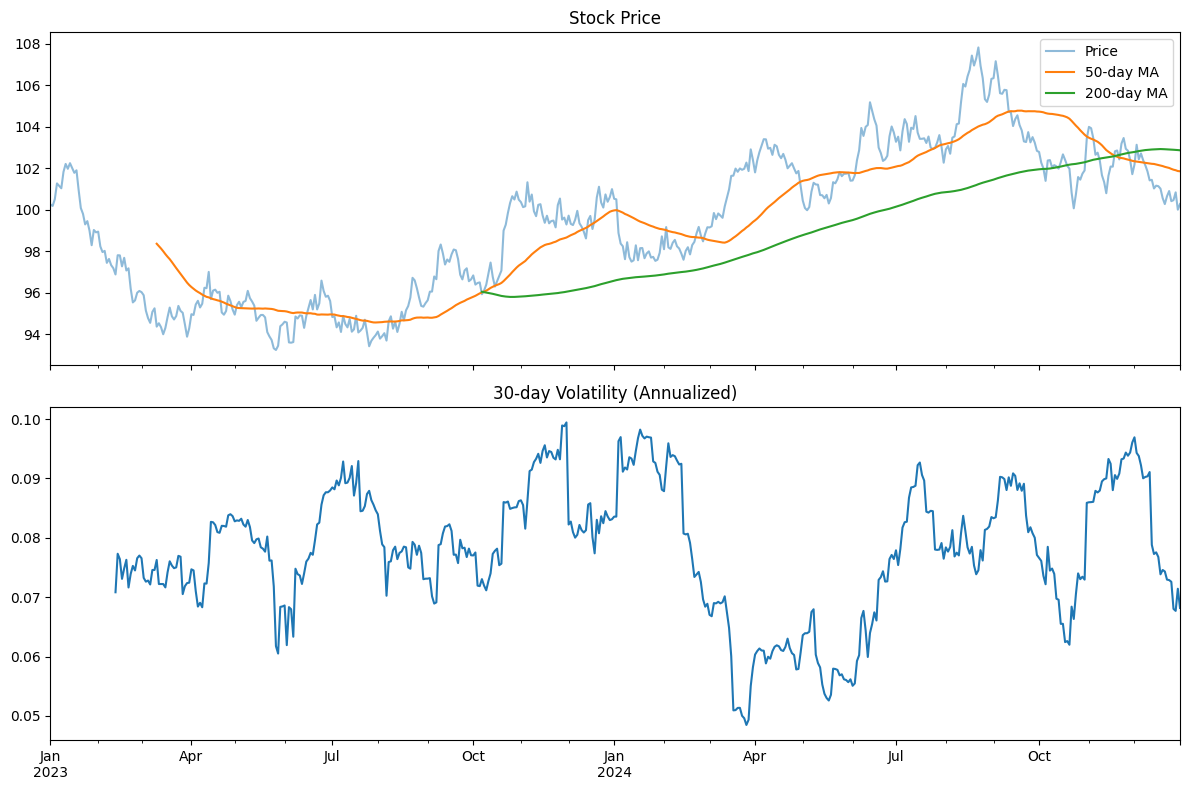

In [10]:
# Combining time series techniques in a real scenario

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate daily stock data for 2 years
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2024-12-31', freq='B')
price = 100 + np.cumsum(np.random.randn(len(dates)) * 0.5)
stock = pd.Series(price, index=dates, name='Price')

# Daily returns
returns = stock.pct_change()

# Moving averages
ma50 = stock.rolling(50).mean()
ma200 = stock.rolling(200).mean()

# Monthly resampling
monthly = stock.resample('ME').ohlc()  # Open, High, Low, Close

# Volatility (30-day rolling std of returns)
volatility = returns.rolling(30).std() * np.sqrt(252)  # Annualized

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
stock.plot(ax=ax1, alpha=0.5, label='Price')
ma50.plot(ax=ax1, label='50-day MA')
ma200.plot(ax=ax1, label='200-day MA')
ax1.legend()
ax1.set_title('Stock Price')
volatility.plot(ax=ax2)
ax2.set_title('30-day Volatility (Annualized)')
plt.tight_layout()
plt.show()


> **Note:** Annualize daily volatility by multiplying by √252 (trading days)


### Time Series Quick Reference (Slide 119)


<p><strong>Create:</strong></p>
<ul>
<li><code>pd.Timestamp()</code> — single moment in time</li>
<li><code>pd.date_range(start, periods, freq)</code> — sequence of timestamps</li>
<li><code>pd.to_datetime()</code> — parse strings/numbers into timestamps</li>
</ul>
<p><strong>Select:</strong></p>
<ul>
<li><code>ts['2024']</code> — entire year</li>
<li><code>ts['2024-03']</code> — entire month</li>
<li><code>ts['2024-01':'2024-06']</code> — date range (inclusive!)</li>
</ul>
<p><strong>Transform:</strong></p>
<table>
<tr><th>Operation</th><th>Method</th></tr>
<tr><td>Change frequency</td><td><code>.resample('ME').mean()</code></td></tr>
<tr><td>Lag / Lead</td><td><code>.shift(n)</code></td></tr>
<tr><td>Returns</td><td><code>.pct_change()</code></td></tr>
<tr><td>Moving average</td><td><code>.rolling(n).mean()</code></td></tr>
<tr><td>Cumulative</td><td><code>.expanding().sum()</code></td></tr>
<tr><td>Timezone</td><td><code>.tz_localize() / .tz_convert()</code></td></tr>
</table>


> **Note:** DatetimeIndex unlocks all time-based selection and resampling
